In [116]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [255]:
filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge')

In [254]:
animal = 'animal_1'
neuron = 0
data = reorganized_data[animal][neuron][:,:,1:]  
data = data[:,:,~np.isnan(data).any(axis=(0,1))]

neuron_activity = data[:,0,:]
input_variables = data[:,1:,:]

flattened_input_variables = []

# Normalize variables to [0,1]
for variable in range(input_variables.shape[1]):
    input_variables[:,variable] = (input_variables[:,variable] - np.min(input_variables[:,variable])) / (np.max(input_variables[:,variable]) - np.min(input_variables[:,variable]))
    flattened_input_variables.append(input_variables[:,variable].flatten())
flattened_input_variables = np.array(flattened_input_variables).T

# Z-score the neuron activity
neuron_activity = (neuron_activity - np.mean(neuron_activity)) / np.std(neuron_activity)


R2: 0.36705341584165596
alpha: 0.1


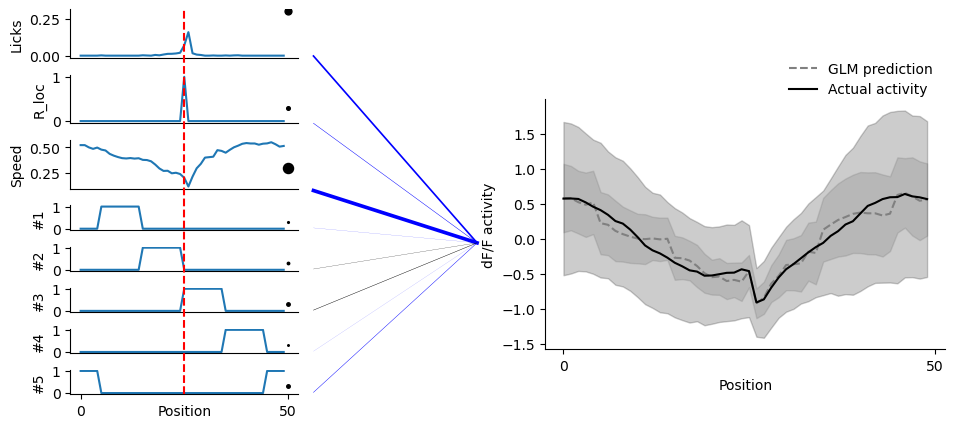

In [257]:
animal='animal_6'
plot_example_neuron(animal, reorganized_data, GLM_params, variable_list)


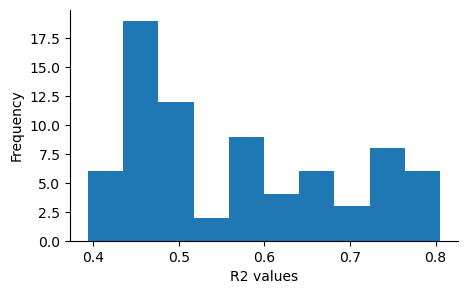

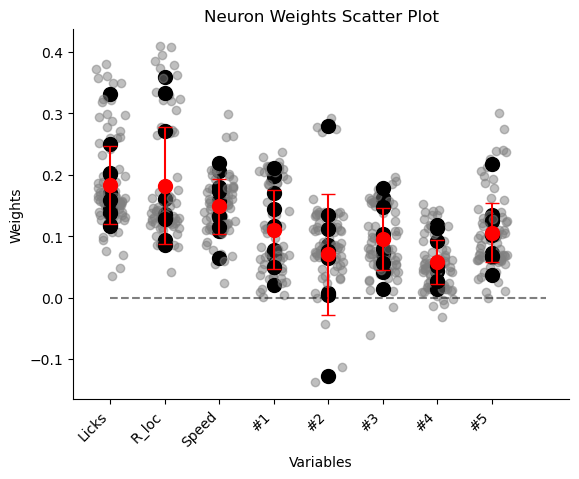

In [111]:
all_R2_values = []
for animal in GLM_params:
    for neuron in GLM_params[animal]:
        all_R2_values.append(GLM_params[animal][neuron]['R2'])
all_R2_values = np.array(all_R2_values)
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(all_R2_values.flatten(), bins=10)
ax.set_xlabel("R2 values")
ax.set_ylabel("Frequency")

plot_GLM_summary_data(GLM_params, variable_list, model_name=filepath, save=False, ax=None)

plt.show()

<BarContainer object of 8 artists>

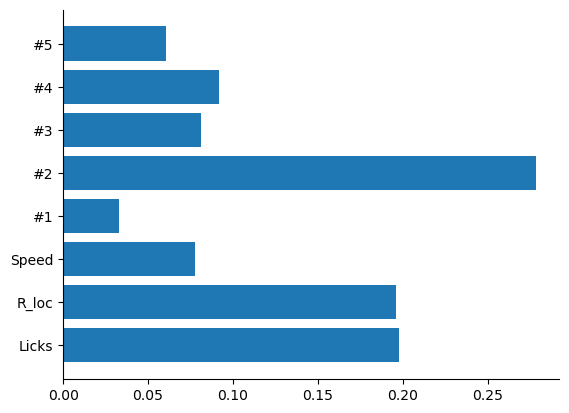

In [10]:
neuron_nr = 2

# Bar graph
plt.barh(variable_list[1:], GLM_params['animal_1'][neuron_nr]['weights'])